### Libraries

In [18]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

## Data

### Tweet data

In [7]:
df = pd.read_csv("data/stock_tweets_test_on_real_data.csv")

In [8]:
df.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


#### Stock count distributions

Ticker Distribution:
Stock Name
TSLA    37422
TSM     11034
AAPL     5056
PG       4089
AMZN     4089
MSFT     4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
NOC        31
F          31
Name: count, dtype: int64


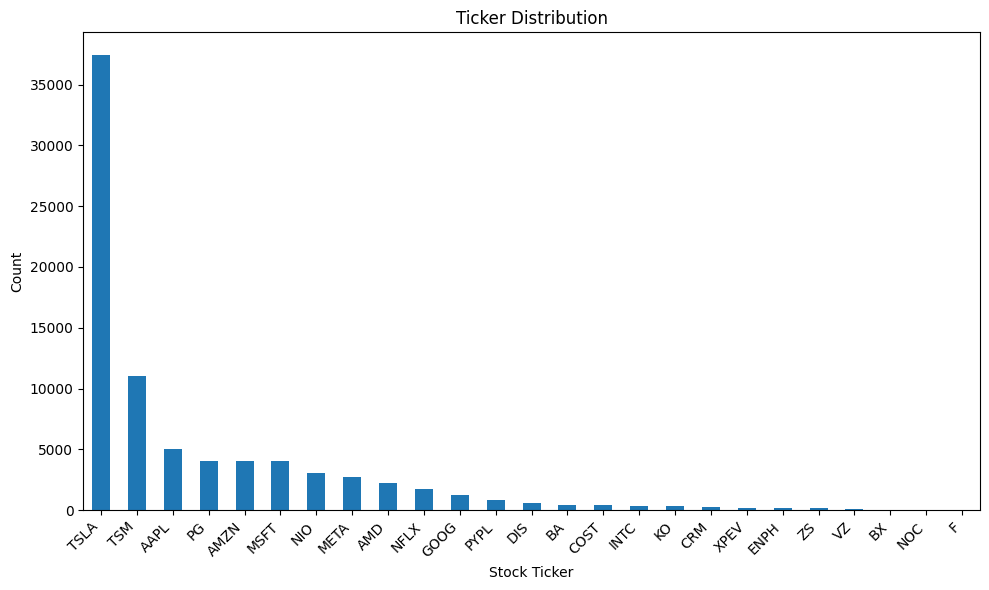


Ticker Distribution Table:
   Ticker  Count
0    TSLA  37422
1     TSM  11034
2    AAPL   5056
3      PG   4089
4    AMZN   4089
5    MSFT   4089
6     NIO   3021
7    META   2751
8     AMD   2227
9    NFLX   1727
10   GOOG   1291
11   PYPL    843
12    DIS    635
13     BA    399
14   COST    393
15   INTC    315
16     KO    310
17    CRM    233
18   XPEV    225
19   ENPH    216
20     ZS    193
21     VZ    123
22     BX     50
23    NOC     31
24      F     31


In [ ]:
# Assuming your data is already in a DataFrame called 'df'
# If not, you'll need to load it from your data source (e.g., CSV, Excel)

# Count the occurrences of each ticker
ticker_counts = df['Stock Name'].value_counts()

# Print the ticker counts
#print("Ticker Distribution:")
#print(ticker_counts)

# Create a bar chart of the ticker distribution
plt.figure(figsize=(10, 6))
ticker_counts.plot(kind='bar')
plt.title('Ticker Distribution')
plt.xlabel('Stock Ticker')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') #rotate x axis labels
plt.tight_layout() #prevent labels from being cut off
plt.show()

# Create a table of the ticker distribution
ticker_table = pd.DataFrame({'Ticker': ticker_counts.index, 'Count': ticker_counts.values})
print("\nTicker Distribution Table:")
print(ticker_table)

These are the number of times the stock ticker appears in a tweet. Clearly this is not very balanced, but it is not entirely relevant for the purposes of our project. 

Should be noted that most of these are large cap stocks and will not be as susceptible to pump/dump situations

#### Tweet mentions distributions

This should be highly correlated with the main stock mentioned, but just to see if there are any different patterns.

In [20]:
tweets = list(df["Tweet"].values)

In [21]:
d = {}

def count_stock_tickers(tweets,d):
    """
    Counts the occurrences of stock tickers (e.g., $SQ, $AMD) in a given tweets.

    Args:
        tweets (arr): The input tweet arr.

    Returns:
        dict: A dictionary where keys are stock tickers (uppercase) and values are counts.
    """
    for tweet in tweets:
        tickers = re.findall(r'\$[A-Za-z0-9]+', tweet) 
        for ticker in tickers:
            ticker = ticker.upper()
            if ticker not in d:
                d[ticker] = 0
            d[ticker] += 1
    

    return d

result = count_stock_tickers(tweets,d)

In [24]:
ticker_pattern = re.compile(r'^\$[A-Z]{1,6}$')  # e.g., $TSLA, $AAPL, $GM

# Filter the dictionary to retain only ticker-like keys
stock_tickers_only = {k: v for k, v in result.items() if ticker_pattern.match(k)}

##### Plot for mentioned tickers

Should be same as previous

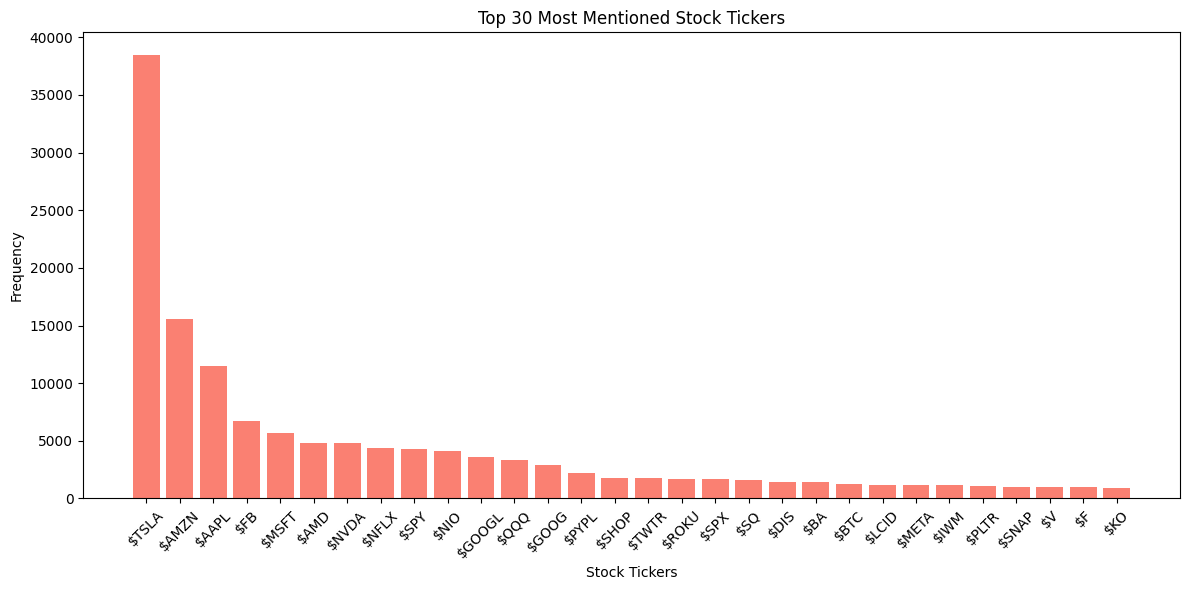

In [ ]:
sorted_tickers = dict(sorted(stock_tickers_only.items(), key=lambda x: x[1], reverse=True))

# Limit to top 30 tickers
top_n = 30
top_tickers = dict(list(sorted_tickers.items())[:top_n])

plt.figure(figsize=(12, 6))
plt.bar(top_tickers.keys(), top_tickers.values(), color='salmon')
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Most Mentioned Stock Tickers')
plt.xlabel('Stock Tickers')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Tweets mentioning other stock tickers counts

This portion is measuring the number of other stock tickers users mention, grouped by the main stock they are talking about

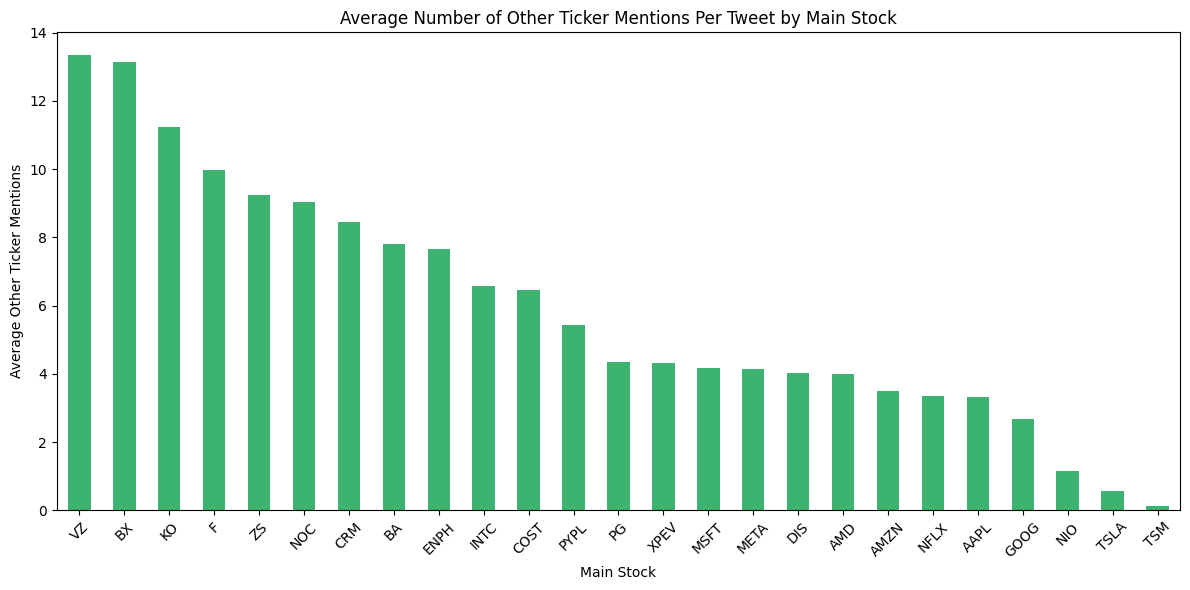

In [29]:
valid_tickers = set(stock_tickers_only.keys())

# Step 2: Function to count tickers in a tweet, excluding the main one
def count_other_tickers(tweet, main_stock):
    tickers_in_tweet = set(re.findall(r'\$[A-Z]{1,6}', tweet))
    main_ticker = f'${main_stock.upper()}'
    other_tickers = tickers_in_tweet & valid_tickers - {main_ticker}
    return len(other_tickers)

# Step 3: Apply function to DataFrame
df['OtherTickerCount'] = df.apply(lambda row: count_other_tickers(row['Tweet'], row['Stock Name']), axis=1)

# Step 4: Group by main stock to analyze patterns
result = df.groupby('Stock Name')['OtherTickerCount'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

import matplotlib.pyplot as plt

# Step 5: Plot average other ticker mentions per stock
plt.figure(figsize=(12, 6))
result['mean'].plot(kind='bar', color='mediumseagreen')
plt.title('Average Number of Other Ticker Mentions Per Tweet by Main Stock')
plt.ylabel('Average Other Ticker Mentions')
plt.xlabel('Main Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Stock data

In [30]:
stock_df = pd.read_csv("data/stock_yfinance_data_test_on_real_data.csv")

In [31]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


#### Checking for unusual volume

In [32]:
import pandas as pd

# Group by each stock and calculate mean + std for volume
def compute_z_scores(group):
    mean_vol = group['Volume'].mean()
    std_vol = group['Volume'].std()
    group['Volume_Z'] = (group['Volume'] - mean_vol) / std_vol
    return group

# Apply to each stock name group
stock_df = stock_df.groupby('Stock Name', group_keys=False).apply(compute_z_scores)

# Flag outliers (e.g., z-score > 2 or < -2)
threshold = 2
df_outliers = stock_df[stock_df['Volume_Z'].abs() > threshold]

# Display the outliers
print(df_outliers[['Date', 'Stock Name', 'Volume', 'Volume_Z']])


            Date Stock Name     Volume  Volume_Z
17    2021-10-25       TSLA  188556300  4.235754
18    2021-10-26       TSLA  187245000  4.184313
22    2021-11-01       TSLA  168146100  3.435076
28    2021-11-09       TSLA  177317400  3.794860
79    2022-01-24       TSLA  151565700  2.784639
...          ...        ...        ...       ...
6293  2022-09-21       XPEV   41645500  4.661615
6295  2022-09-23       XPEV   28279600  2.539901
6296  2022-09-26       XPEV   27891300  2.478261
6298  2022-09-28       XPEV   31799400  3.098637
6299  2022-09-29       XPEV   33044800  3.296333

[258 rows x 4 columns]


/var/folders/q3/p7x07_8d2b9fv9qcmf0s6wyc0000gn/T/ipykernel_5274/3154474774.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_df = stock_df.groupby('Stock Name', group_keys=False).apply(compute_z_scores)


These are potential dates where we could look out for stock tweets regarding them

##### Dates that coincide

In [33]:
# Step 1: Count how many unique stocks had outlier activity on each date
date_counts = df_outliers['Date'].value_counts()

# Step 2: Filter for dates where multiple stocks had outlier volumes
shared_outlier_dates = date_counts[date_counts > 1]

# Step 3: View details of those dates
df_shared_outliers = df_outliers[df_outliers['Date'].isin(shared_outlier_dates.index)]

# Step 4: Sort and display
df_shared_outliers = df_shared_outliers.sort_values(by='Date')
print(df_shared_outliers[['Date', 'Stock Name', 'Volume', 'Volume_Z']])


            Date Stock Name     Volume  Volume_Z
17    2021-10-25       TSLA  188556300  4.235754
6065  2021-10-25       XPEV   28325800  2.547234
18    2021-10-26       TSLA  187245000  4.184313
774   2021-10-26       META   65654000  2.068329
4050  2021-10-26       INTC   68405400  2.218587
...          ...        ...        ...       ...
1502  2022-09-16       GOOG   64540100  3.611003
6295  2022-09-23       XPEV   28279600  2.539901
3271  2022-09-23       COST    5377800  2.819249
2014  2022-09-28       AAPL  146691400  2.170668
6298  2022-09-28       XPEV   31799400  3.098637

[196 rows x 4 columns]


##### Unique dates

In [34]:
# Step 1: Find dates with only 1 outlier ticker
unique_outlier_dates = df_outliers['Date'].value_counts()
non_shared_dates = unique_outlier_dates[unique_outlier_dates == 1].index

# Step 2: Filter original outliers for those dates only
df_non_shared_outliers = df_outliers[df_outliers['Date'].isin(non_shared_dates)]

# Step 3: View the results
print(df_non_shared_outliers[['Date', 'Stock Name', 'Volume', 'Volume_Z']])


            Date Stock Name     Volume  Volume_Z
22    2021-11-01       TSLA  168146100  3.435076
332   2022-01-25       MSFT   72848600  3.986762
580   2022-01-19         PG   14088300  2.528113
845   2022-02-07       META   88613800  3.399052
846   2022-02-08       META   94729700  3.753522
...          ...        ...        ...       ...
6087  2021-11-24       XPEV   26702700  2.289582
6273  2022-08-23       XPEV   28802200  2.622859
6293  2022-09-21       XPEV   41645500  4.661615
6296  2022-09-26       XPEV   27891300  2.478261
6299  2022-09-29       XPEV   33044800  3.296333

[62 rows x 4 columns]
